# Packages

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gpd
import pycrs
import pyproj
import fiona
import shapely.wkb as swkb
from shapely.geometry import Point, Polygon
from fiona.crs import from_epsg
from fiona._env import GDALEnv

import requests
import psycopg2
import sqlite3
import geojson
from sqlalchemy.engine.url import URL
from sqlalchemy import create_engine, MetaData, event
from sqlalchemy.orm import sessionmaker
from geoalchemy2 import WKTElement, Geometry

import os
os.getcwd()

'c:\\Users\\gilramolete\\OneDrive - UNIONBANK of the Philippines\\Documents 1\\Geospatial Analysis\\Automating GIS Processes'

# Introduction to Geopandas

## Reading a Shapefile

Typically reading the data into Python is the first step of the analysis pipeline. In GIS, there exists various dataformats such as Shapefile, GeoJSON, KML, and GPKG that are probably the most common vector data formats. Geopandas is capable of reading data from all of these formats (plus many more). Reading spatial data can be done easily with geopandas using `gpd.from_file()`-function:

In [2]:
# Set filepath
fp = "data/L2/L2_data/DAMSELFISH_distributions.shp"

# Read file using gpd.read_file()
data = gpd.read_file(fp)
data

,ID_NO,BINOMIAL,ORIGIN,COMPILER,YEAR,CITATION,SOURCE,DIST_COMM,ISLAND,SUBSPECIES,...,RL_UPDATE,KINGDOM_NA,PHYLUM_NAM,CLASS_NAME,ORDER_NAME,FAMILY_NAM,GENUS_NAME,SPECIES_NA,CATEGORY,geometry
0,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-115.64375 29.71392, -115.61585 29.6..."
1,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-105.58995 21.89340, -105.56483 21.8..."
2,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-111.15962 19.01536, -111.15948 18.9..."
3,183793.0,Chromis intercrusma,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Chromis,intercrusma,LC,"POLYGON ((-80.86500 -0.77894, -80.75930 -0.833..."
4,183793.0,Chromis intercrusma,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Chromis,intercrusma,LC,"POLYGON ((-67.33922 -55.67610, -67.33755 -55.6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,183774.0,Azurina hirundo,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Azurina,hirundo,NT,"POLYGON ((-120.11829 34.47283, -120.10502 34.4..."
227,183774.0,Azurina hirundo,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Azurina,hirundo,NT,"POLYGON ((-117.41363 29.18823, -117.40898 29.1..."
228,183774.0,Azurina hirundo,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Azurina,hirundo,NT,"POLYGON ((-114.63839 28.39008, -114.63660 28.3..."
229,183774.0,Azurina hirundo,1,IUCN,2010,International Union for Conservation of Nature...,None,None,None,None,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Azurina,hirundo,NT,"POLYGON ((-111.15962 19.01536, -111.15948 18.9..."


In [3]:
type(data)

geopandas.geodataframe.GeoDataFrame

So from the above, we can see that our `data`-variable is a `GeoDataFrame`. GeoDataFrame extends the functionalities of `pandas.DataFrame` in a way that it is possible to use and handle spatial data using similar approaches and datastructures as in Pandas (hence the name geopandas). GeoDataFrame have some special features and functions that are useful in GIS.

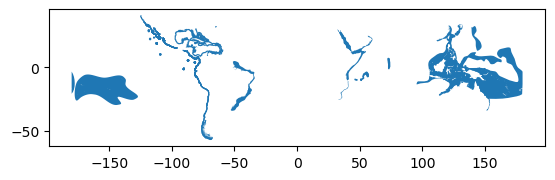

In [4]:
data.plot()
plt.show()

## Writing a Shapefile

Writing the spatial data into disk for example as a new Shapefile is also something that is needed frequently.

In [5]:
# Create an output path for the data
outfp = 'data/L2/L2_data/DAMSELFISH_distributions_SELECTION.shp'

# Select first 50 rows
selection = data[0:50]

# Write those rows into a new Shapefile (the default output file format is Shapefile)
selection.to_file(outfp)

## Geometries in Geopandas

Geopandas takes advantage of Shapely’s geometric objects. Geometries are stored in a column called `geometry` that is a default column name for storing geometric information in geopandas.

In [6]:
data['geometry'].head()

0    POLYGON ((-115.64375 29.71392, -115.61585 29.6...
1    POLYGON ((-105.58995 21.89340, -105.56483 21.8...
2    POLYGON ((-111.15962 19.01536, -111.15948 18.9...
3    POLYGON ((-80.86500 -0.77894, -80.75930 -0.833...
4    POLYGON ((-67.33922 -55.67610, -67.33755 -55.6...
Name: geometry, dtype: geometry

As we can see the `geometry` column contains familiar looking values, namely Shapely `Polygon`-objects that we learned to use last week. Since the spatial data is stored as Shapely objects, **it is possible to use all of the functionalities of Shapely module**.

Let’s prove that this really is the case by iterating over a sample of the data, and printing the `area` of first five polygons.

In [7]:
# Make a selection that contains only the first five rows
selection = data[0:5]

# Iterate over rows and print the area of a Polygon
for index, row in selection.iterrows():
    # Get area of the polygon
    poly_area = row['geometry'].area
    # Print information for the user
    print(f"Polygon area at index {index} is {poly_area:.4f}")

Polygon area at index 0 is 19.3963
Polygon area at index 1 is 6.1459
Polygon area at index 2 is 2.6972
Polygon area at index 3 is 87.4606
Polygon area at index 4 is 0.0009


As you might guess from here, all the functionalities of **Pandas**, such as the `iterrows()` function, are directly available in Geopandas without the need to call pandas separately because Geopandas is an **extension** for Pandas.

Let’s next create a new column into our GeoDataFrame where we calculate and store the areas of individual polygons into that column. Calculating the areas of polygons is really easy in geopandas by using `GeoDataFrame.area` attribute. Hence, it is not needed to actually iterate over the rows line by line as we did previously:

In [8]:
# Create a new column called 'area' and assign the area of the Polygons into it
data['area'] = data.area

# Print first 2 rows of the area column
print(data['area'].head(2))

0    19.396254
1     6.145902
Name: area, dtype: float64


C:\Users\gilramolete\AppData\Local\Temp\ipykernel_29472\1980055391.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  data['area'] = data.area


As we can see, the area of our first polygon seems to be approximately `19.396` and `6.146` for the second polygon. They correspond to the ones we saw in previous step when iterating rows, hence, everything seems to work as should.

Let’s check what is the `min`, `max`, and `mean` of those areas using familiar functions from our previous Pandas lessons.

In [9]:
# Maximum area
max_area = data['area'].max()

# Minimum area
min_area = data['area'].min()

# Mean area
mean_area = data['area'].mean()

print(f'Max area: {max_area}\nMin area: {min_area}\nMean area: {mean_area}')

Max area: 1493.2009183643906
Min area: 2.9890006154142965e-15
Mean area: 19.95843361720849


The largest Polygon in our dataset seems to be around 1494 square decimal degrees (~ 165 000 km2) and the average size is ~20 square decimal degrees (~2200 km2). The minimum polygon size seems to be `0.0`, hence it seems that there exists really small polygons as well in the data as well (rounds to 0 with 2 decimals).

## Creating geometries into a GeoDataFrame

Since geopandas takes advantage of Shapely geometric objects, it is possible to create a Shapefile from a scratch by passing Shapely’s geometric objects into the GeoDataFrame. This is useful as it makes it easy to convert e.g. a text file that contains coordinates into a Shapefile. Next we will see how to create a Shapefile from scratch.

Let’s create an empty `GeoDataFrame`.

In [11]:
# Create an empty geopandas GeoDataFrame
newdata = gpd.GeoDataFrame()
print(newdata)

Empty GeoDataFrame
Columns: []
Index: []


As we can see, the GeoDataFrame is empty since we haven’t yet stored any data into it.

Let’s create a new column called `geometry` that will contain our Shapely objects. Let’s also create a Shapely ```Polygon``` representing the Helsinki Senate square that we can later insert to our GeoDataFrame:

In [12]:
newdata['geometry'] = None

# Coordinates of the Helsinki Senate square in Decimal Degrees
coordinates = [(24.950899, 60.169158), (24.953492, 60.169158), (24.953510, 60.170104), (24.950958, 60.169990)]

# Create a Shapely polygon from the coordinate-tuple list
poly = Polygon(coordinates)
print(poly)

POLYGON ((24.950899 60.169158, 24.953492 60.169158, 24.95351 60.170104, 24.950958 60.16999, 24.950899 60.169158))


In [13]:
# Insert the polygon into 'geometry' column at index 0
newdata.loc[0, 'geometry'] = poly
print(newdata)

                                            geometry
0  POLYGON ((24.95090 60.16916, 24.95349 60.16916...


In [14]:
# Add a new column and insert data
newdata.loc[0, 'location'] = 'Senaatintori'
print(newdata)

                                            geometry      location
0  POLYGON ((24.95090 60.16916, 24.95349 60.16916...  Senaatintori


Okay, now we have additional information that is useful for recognicing what the feature represents.

Before exporting the data it is always good (basically necessary) to determine the coordinate reference system (projection) for the GeoDataFrame. GeoDataFrame has an attribute called .crs that shows the coordinate system of the data which is empty (None) in our case since we are creating the data from the scratch (more about projection on next tutorial):

In [15]:
print(newdata.crs)

None


In [16]:
# Set the GeoDataFrame's coordinate system to WGS84 (i.e. epsg code 4326)
newdata.crs = from_epsg(4326)

# Let's see how the crs definition looks like
print(newdata.crs)

+init=epsg:4326 +no_defs +type=crs


c:\Users\gilramolete\Anaconda3\envs\pls\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


As we can see, now we have associated coordinate reference system information (i.e. `CRS`) into our `GeoDataFrame`. The CRS information here, is a Python `dictionary` containing necessary values for geopandas to create a `.prj` file for our Shapefile that contains the CRS info.

Finally, we can export the GeoDataFrame using `.to_file()`-function. The function works quite similarly as the export functions in numpy or pandas, but here we only need to provide the output path for the Shapefile. Easy isn’t it!:

In [17]:
# Determine the output path for the Shapefile
outfp = "data/L2/L2_data/Senaatintori.shp"

# Write the data into that Shapefile
newdata.to_file(outfp)

Now we have successfully created a Shapefile from the scratch using only Python programming. Similar approach can be used to for example to read coordinates from a text file (e.g. points) and create Shapefiles from those automatically.

## Saving multiple Shapefiles

We will group individual fish subspecies in our DAMSELFISH_distribution.shp and export those into separate Shapefiles.

In [18]:
# Read Damselfish data
fp = "data/L2/L2_data/DAMSELFISH_distributions.shp"
data = gpd.read_file(fp)

# Print columns
print(data.columns)

Index(['ID_NO', 'BINOMIAL', 'ORIGIN', 'COMPILER', 'YEAR', 'CITATION', 'SOURCE',
       'DIST_COMM', 'ISLAND', 'SUBSPECIES', 'SUBPOP', 'LEGEND', 'SEASONAL',
       'TAX_COMM', 'RL_UPDATE', 'KINGDOM_NA', 'PHYLUM_NAM', 'CLASS_NAME',
       'ORDER_NAME', 'FAMILY_NAM', 'GENUS_NAME', 'SPECIES_NA', 'CATEGORY',
       'geometry'],
      dtype='object')


In [19]:
data['BINOMIAL'].unique()

array(['Stegastes leucorus', 'Chromis intercrusma', 'Stegastes beebei',
       'Stegastes rectifraenum', 'Chromis punctipinnis', 'Chromis crusma',
       'Chromis pembae', 'Stegastes redemptus', 'Teixeirichthys jordani',
       'Chromis limbaughi', 'Microspathodon dorsalis', 'Chromis cyanea',
       'Amphiprion sandaracinos', 'Nexilosus latifrons',
       'Stegastes baldwini', 'Microspathodon bairdii', 'Azurina eupalama',
       'Chromis flavicauda', 'Stegastes arcifrons', 'Chromis alta',
       'Abudefduf declivifrons', 'Chromis alpha', 'Stegastes flavilatus',
       'Abudefduf concolor', 'Abudefduf troschelii',
       'Chrysiptera flavipinnis', 'Chromis atrilobata',
       'Stegastes acapulcoensis', 'Hypsypops rubicundus',
       'Azurina hirundo'], dtype=object)

In [20]:
# Group the data by column 'BINOMIAL'
grouped = data.groupby('BINOMIAL')

# Iterate over the group object
for key, values in grouped:
    individual_fish = values

# Let's see what is the LAST item and key we iterated
print('Key: ', key)
print(individual_fish)

Key:  Teixeirichthys jordani
       ID_NO                BINOMIAL  ORIGIN COMPILER  YEAR  \
27  154915.0  Teixeirichthys jordani       1     None  2012   
28  154915.0  Teixeirichthys jordani       1     None  2012   
29  154915.0  Teixeirichthys jordani       1     None  2012   
30  154915.0  Teixeirichthys jordani       1     None  2012   
31  154915.0  Teixeirichthys jordani       1     None  2012   
32  154915.0  Teixeirichthys jordani       1     None  2012   
33  154915.0  Teixeirichthys jordani       1     None  2012   

                                             CITATION SOURCE DIST_COMM ISLAND  \
27  Red List Index (Sampled Approach), Zoological ...   None      None   None   
28  Red List Index (Sampled Approach), Zoological ...   None      None   None   
29  Red List Index (Sampled Approach), Zoological ...   None      None   None   
30  Red List Index (Sampled Approach), Zoological ...   None      None   None   
31  Red List Index (Sampled Approach), Zoological ...   None 

From here we can see that the `individual_fish`-variable contains all the rows that belongs to a fish called `Teixeirichthys jordani` that is the `key` for conducting the grouping. Notice that the index numbers refer to the row numbers in the original data -GeoDataFrame.

As we can see, each set of data are now grouped into separate GeoDataFrames that we can export into Shapefiles using the variable `key` for creating the output filename. Next, we use a specific string formatting method to produce the output filename using `%` operator.

Let’s now export all individual subspecies into separate Shapefiles:

In [21]:
# Determine output directory
out_directory = 'data/L2/L2_data'

# Create a new folder called 'Results'
result_folder = os.path.join(out_directory, 'Results')

# Check if the folder exists already
if not os.path.exists(result_folder):
    # If it does not exist, make one
    os.makedirs(result_folder)

# Iterate over the groups
for key, values in grouped:
    # Format the filename (replace spaces with underscores using 'replace()' function)
    output_name = '%s.shp' % key.replace(' ', '')

    # Print some information for the user
    print('Processing: %s' % key)

    # Create an output path
    outpath = os.path.join(result_folder, output_name)

    # Export the data
    values.to_file(outpath)

Processing: Abudefduf concolor
Processing: Abudefduf declivifrons
Processing: Abudefduf troschelii
Processing: Amphiprion sandaracinos
Processing: Azurina eupalama
Processing: Azurina hirundo
Processing: Chromis alpha
Processing: Chromis alta
Processing: Chromis atrilobata
Processing: Chromis crusma
Processing: Chromis cyanea
Processing: Chromis flavicauda
Processing: Chromis intercrusma
Processing: Chromis limbaughi
Processing: Chromis pembae
Processing: Chromis punctipinnis
Processing: Chrysiptera flavipinnis
Processing: Hypsypops rubicundus
Processing: Microspathodon bairdii
Processing: Microspathodon dorsalis
Processing: Nexilosus latifrons
Processing: Stegastes acapulcoensis
Processing: Stegastes arcifrons
Processing: Stegastes baldwini
Processing: Stegastes beebei
Processing: Stegastes flavilatus
Processing: Stegastes leucorus
Processing: Stegastes rectifraenum
Processing: Stegastes redemptus
Processing: Teixeirichthys jordani


# Map Projections

**Coordinate reference systems (CRS)** are important because the geometric shapes in a GeoDataFrame are simply a collection of coordinates in an arbitrary space. A CRS tells Python **how those coordinates are related to places on the Earth**. A map projection (or a projected coordinate system) is a **systematic transformation of the latitudes and longitudes into a plain surface where units are quite commonly represented as meters** (instead of decimal degrees). This transformation is used to represent the three dimensional earth on a flat, two dimensional map.

As the CRS in different spatial datasets differ fairly often (i.e. one might have coordinates defined in decimal degrees while the other one has them in meters), it is a common procedure to redefine (or reproject) the CRS to be identical in both layers. It is important that the layers have the same coordinate reference system as it makes it possible to analyze the spatial relationships between the layers, such as conduct a Point in Polygon -query.

Choosing an appropriate projection for your map is not always straightforward because it depends on what you actually want to represent with your map, and what is the spatial scale of your data. In fact, there does not exist a “perfect projection” since each one of them has some strengths and weaknesses, and you should choose such projection that fits best for your needs. In fact, the projection you choose might even tell something about you:

<p align = 'center'>
    <img src = 'https://automating-gis-processes.github.io/CSC/_images/Map-projections.png'>
</p>

## CRS in Geopandas

Luckily, defining and changing projections is easy in Geopandas. In this tutorial we will see how to retrieve the coordinate reference system information from the data, and how to change it. We will re-project a data file from WGS84 (lat, lon coordinates) into a Lambert Azimuthal Equal Area projection which is the recommended projection for Europe by European Commission.

For this tutorial we will be using a Shapefile called `Europe_borders.shp` representing the country borders in Europe, that you already should have downloaded during the previous tutorial.

Shapefile should always contain information about the coordinate reference system that is stored in `.prj`-file (at least if the data has been appropriately produced). When reading the data into `GeoDataFrame` with Geopandas this information is automatically stored into `.crs` attribute of the GeoDataFrame.

In [23]:
# Read file
fp = 'data/L2/L2_data/Europe_borders.shp'
data = gpd.read_file(fp)

data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

As we can see, here, the `crs` is a Python dictionary with a key `init` that has a value `epsg:4326`. This is a very typical way how CRS is stored in GeoDataFrames. There is also another typical way of representing the coordinate reference system, namely storing that information in Proj4-string format (we will come back to this later).

The EPSG number (*“European Petroleum Survey Group”*) is a code that tells about the coordinate system of the dataset. “EPSG Geodetic Parameter Dataset is a collection of definitions of coordinate reference systems and coordinate transformations which may be global, regional, national or local in application”. EPSG code `4326`, what we have here, belongs to the WGS84 coordinate system (i.e. coordinates are in decimal degrees: latitudes and longitudes).

WGS84 projection is not really a good one for representing European borders, so let’s convert those geometries into Lambert Azimuthal Equal Area projection (EPSG: 3035) which is the recommended projection by European Comission.

Changing the projection is simple to do in Geopandas with `.to_crs()`-function which is a built-in function of the GeoDataFrame. The function has two alternative parameters 1) `crs` and 2) `espg` that can be used to make the coordinate transformation and re-project the data into the CRS that you want to use.

In [24]:
# Let's make a copy of our data
orig = data.copy()
print(orig['geometry'].head())

# Reproject the data
data = data.to_crs(epsg = 3035)

# Check the new geometry values
print(data['geometry'].head())

0    POLYGON ((8.45778 54.56236, 8.44953 54.56269, ...
1    POLYGON ((8.71992 47.69664, 8.72092 47.69530, ...
2    POLYGON ((6.73317 53.57409, 6.73017 53.57542, ...
3    POLYGON ((6.85822 53.59411, 6.85592 53.59550, ...
4    POLYGON ((6.89894 53.62561, 6.88439 53.62814, ...
Name: geometry, dtype: geometry
0    POLYGON ((4221214.558 3496203.404, 4220681.651...
1    POLYGON ((4224860.478 2732279.320, 4224932.819...
2    POLYGON ((4104652.176 3390034.953, 4104460.401...
3    POLYGON ((4113025.664 3391895.756, 4112879.943...
4    POLYGON ((4115871.228 3395282.099, 4114921.348...
Name: geometry, dtype: geometry


And here we go, the coordinate values in the geometries have changed! Now we have successfully changed the projection of our layer into a new one, i.e. to `ETRS-LAEA` projection.

To really understand what is going on, it is good to explore our data visually. Hence, let’s compare the datasets by making maps out of them.

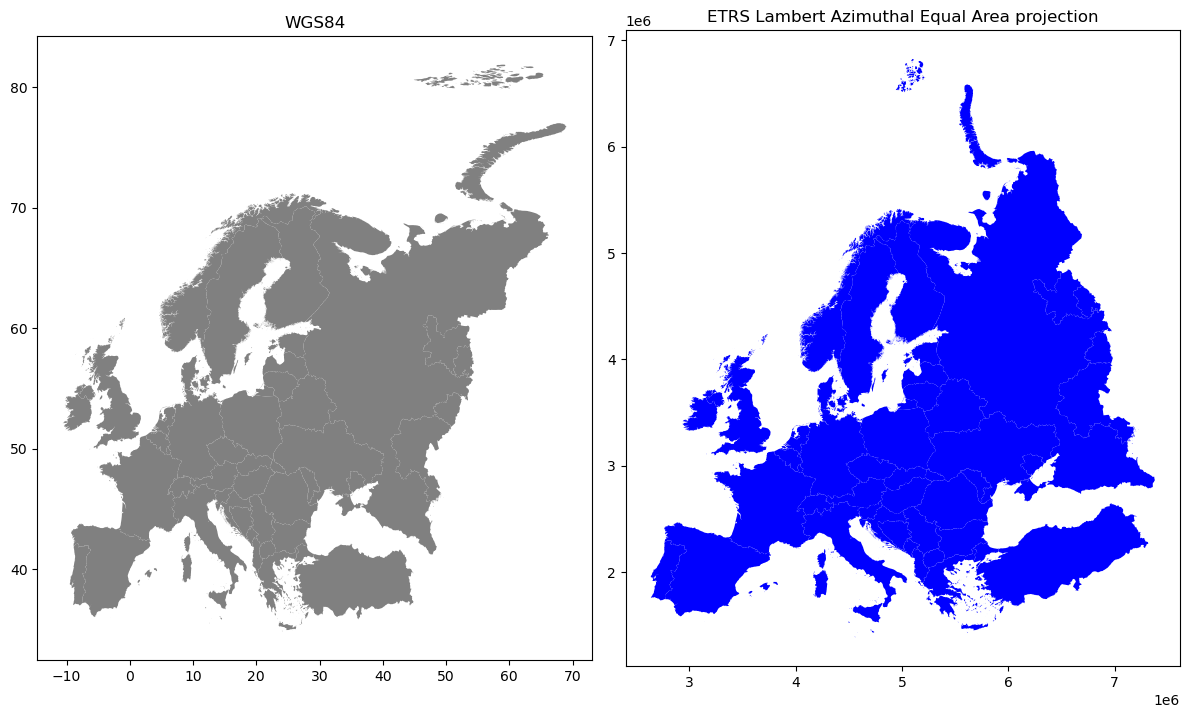

In [25]:
# Make subplots that are next to each other
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 8))

# Plot the data in WGS84 CRS
orig.plot(ax = ax1, facecolor = 'grey')

# Add title
ax1.set_title('WGS84')

# Plot the one with ETRS-LAEA projection
data.plot(ax = ax2, facecolor = 'blue')

# Add title
ax2.set_title('ETRS Lambert Azimuthal Equal Area projection')

# Remove empty white space around the plot
plt.tight_layout()
plt.show()

Indeed, the maps look quite different, and the re-projected one looks much better in Europe as the areas especially in the north are more realistic and not so stretched as in WGS84.

In [26]:
# Output filepath
outfp = 'data/L2/L2_data/Europe_borders_epsg3035.shp'

# Save to disk
data.to_file(outfp)

NOTICE: On Windows, the `.prj`-file might NOT update with the new CRS value when saving to Shapefile. If this happens it is possible to fix the `prj` by passing the coordinate reference information as proj4-string. For this purpose a library called PyCRS is a handy tool that makes passing the proj4-strings easy. PyCRS has functions `pycrs.parse.from_epsg_code()` and `.to_proj4()` that can be used to define the CRS as proj4-string format:

In [30]:
# Define the crs for the GeoDataFrame as proj4-string
epsg_code = 3035
data.crs = pycrs.parse.from_epsg_code(epsg_code).to_proj4()

# Let's see what we have now...
data.crs

<Bound CRS: +proj=laea +ellps=GRS80 +a=6378137.0 +rf=298.25722 ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from unknown to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: unknown using towgs84=0,0,0,0,0,0,0
- Ellipsoid: GRS 1980
- Prime Meridian: unknown
Source CRS: unknown

As we can see, now the CRS of the GeoDataFrame is represented as Proj4-string that will be saved into the `.prj`-file when saving the GeoDataFrame into Shapefile.

The PyCRS library is really useful as it contains information and supports many different coordinate reference definitions, such as OGC WKT (v1), ESRI WKT, Proj4, and any EPSG, ESRI, or SR-ORG code available from spatialreference.org.

In [31]:
# Output filepath
outfp = 'data/L2/L2_data/Europe_borders_epsg3035.shp'

# Save to disk
data.to_file(outfp)

## Calculating distances

Next, we will conduct a practical example, and continue working with the `Europe_borders.shp`-file. Our aim is to find the Euclidean distances from the centroids (midpoints) of all European countries to Helsinki, Finland. We will calculate the distance between Helsinki and other European countries using a metric projection (Azimuthal Equidistant -projection) that gives us the distance in meters. Notice, that this projection is slightly less commonly used, but still useful to know.

In [32]:
# Create the point representing Helsinki (in WGS84)
hki_lon = 24.9417
hki_lat = 60.1666

# Create GeoDataFrame
helsinki = gpd.GeoDataFrame([[Point(hki_lon, hki_lat)]], geometry = 'geometry', crs = {'init': 'epsg:4326'}, columns = ['geometry'])

# Print
print(helsinki)

                    geometry
0  POINT (24.94170 60.16660)


c:\Users\gilramolete\Anaconda3\envs\pls\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


As we can see, it is possible to create a GeoDataFrame directly with one line of code. Notice that, here, we specified the CRS directly by passing the crs as Python dictionary `{'init': 'epsg:4326'}` which is one alternative way to define the CRS. We also told that the geometry information is stored in column called `'geometry'` that we actually define with parameter `columns = ['geometry']`.

Next, we need to convert this `GeoDataFrame` to “Azimuthal Equidistant” -projection that has useful properties because all points on the map in that projection are at proportionately correct distances from the center point (defined with parameters `lat_0` and `lon_0`), and all points on the map are at the correct direction from the center point.

To conduct the transformation, we are going to utilize again a Proj4-string that we can obtain using another library concentrated for coordinate reference systems, called pyproj. This package is useful when dealing with “special” projections such as the one demonstrated here.

We will create our Proj4-string by passing specific parameters to `Proj()`-object that are needed to construct the Azimuthal Equidistant projection:
- `proj = 'aeqd'` refers to **projection specifier** that we determine to be Azimuthal Equidistant (‘aeqd’)
- `ellps = 'WGS84'` refers to the **reference ellipsoid that is a mathematically modelled (based on measurements) surface that approximates the true shape of the world**. World Geodetic System (WGS) was established in 1984, hence the name.
- `datum = 'WGS84'` refers to the **Geodetic datum that is a coordinate system constituted with a set of reference points that can be used to locate places on Earth**.
- `lat_0` is the latitude coordinate of the center point in the projection
- `lon_0` is the longitude coordinate of the center point in the projection

In [33]:
# Define the projection using the coordinates of our Helsinki point (hki_lat, hki_lon) as the center point
# The .srs here returns the Proj4-string presentation of the projection
aeqd = pyproj.Proj(proj = 'aeqd', ellps = 'WGS84', datum = 'WGS84', lat_0 = hki_lat, lon_0 = hki_lon).srs

# Reproject the aeqd projection using Proj4-string
helsinki = helsinki.to_crs(crs = aeqd)

# Print the data
print(helsinki)

# Print the crs
print('\nCRS:\n', helsinki.crs)

              geometry
0  POINT (0.000 0.000)

CRS:
 +proj=aeqd +lat_0=60.1666 +lon_0=24.9417 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs +type=crs


As we can see the projection is indeed centered to Helsinki as the 0-position (in meters) in both x and y is defined now directly into the location where we defined Helsinki to be located (you’ll understand soon better when seeing the map).

Next we want to transform the `Europe_borders.shp` data into the desired projection.

In [34]:
# Create a copy
europe_borders_aeqd = data.copy()

# Reproject to aeqd projection that we defined earlier
europe_borders_aeqd = europe_borders_aeqd.to_crs(crs = aeqd)

# Print
print(europe_borders_aeqd.head())

            TZID                                           geometry
0  Europe/Berlin  POLYGON ((-1057542.597 -493724.802, -1058052.5...
1  Europe/Berlin  POLYGON ((-1216418.435 -1243831.635, -1216378....
2  Europe/Berlin  POLYGON ((-1194521.639 -571726.459, -1194674.9...
3  Europe/Berlin  POLYGON ((-1185933.276 -571780.053, -1186040.7...
4  Europe/Berlin  POLYGON ((-1182416.220 -569097.571, -1183274.4...


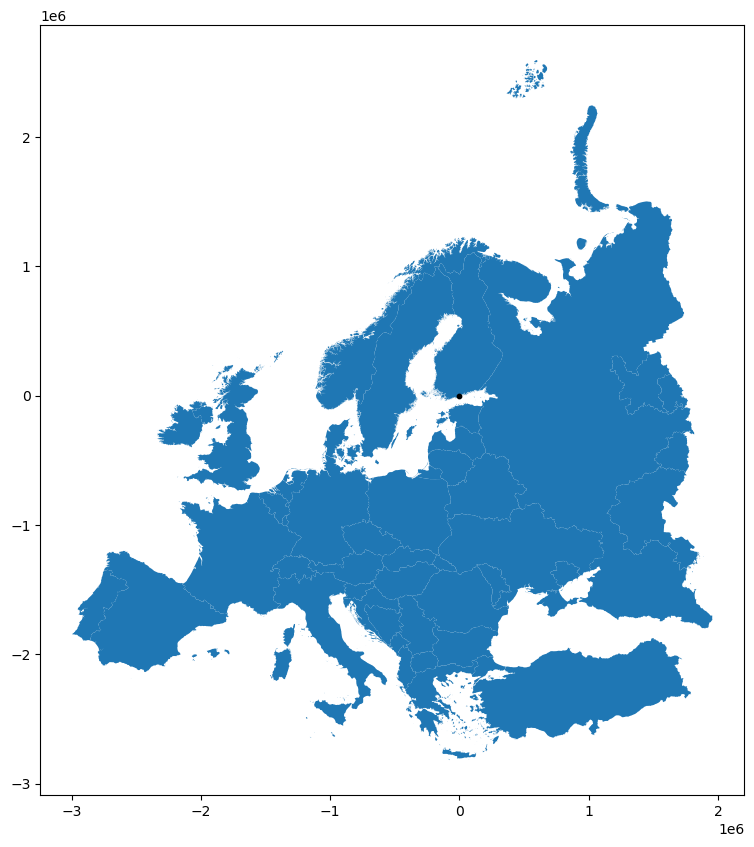

In [35]:
fig, ax = plt.subplots(1, 1, figsize = (10, 10))

europe_borders_aeqd.plot(ax = ax)

helsinki.plot(ax = ax, color = 'black', markersize = 10)

plt.show()

As we can see from the map, the projection is indeed centered to Helsinki as the 0-position of the x and y axis is located where Helsinki is positioned. Now the coordinate values are showing the distance from Helsinki (black point) to different directions (South, North, East and West) in meters.

Next, our goal is to calculate the distance from all countries to Helsinki. To be able to do that, we need to calculate the centroids for all the Polygons representing the boundaries of European countries.

In [36]:
europe_borders_aeqd['centroid'] = europe_borders_aeqd.centroid
europe_borders_aeqd.head()

,TZID,geometry,centroid
0,Europe/Berlin,"POLYGON ((-1057542.597 -493724.802, -1058052.5...",POINT (-1057718.135 -492420.566)
1,Europe/Berlin,"POLYGON ((-1216418.435 -1243831.635, -1216378....",POINT (-1218235.217 -1242668.590)
2,Europe/Berlin,"POLYGON ((-1194521.639 -571726.459, -1194674.9...",POINT (-1194210.789 -568987.153)
3,Europe/Berlin,"POLYGON ((-1185933.276 -571780.053, -1186040.7...",POINT (-1185320.606 -571340.313)
4,Europe/Berlin,"POLYGON ((-1182416.220 -569097.571, -1183274.4...",POINT (-1182191.163 -567293.764)


Now we have created a new column called `centroid` that has the Point geometries representing the centroids of each Polygon (in Azimuthal Equidistant projection).

Next, we will calculate the distances between the country centroids and Helsinki. For doing this, we could use `iterrows()`-function that we have used earlier, but here we will demonstrate a more efficient (faster) technique to go through all rows in (Geo)DataFrame by using `apply()` -function.

The `apply()`-function can give a big boost in performance over the `iterrows()` and it is the recommendable way of iterating over the rows in (Geo)DataFrames. Here, we will see how to use that to calculate the distance between the centroids and Helsinki.

In [37]:
def calculate_distance(row, dest_geom, src_col = 'geometry', target_col = 'geometry'):
    """Calculates the distance between Point geometries

    Args:
        row (_type_): _description_
        dest_geom (shapely.Point): A single Shapely Point geometry to which the distances will be calculated to
        src_col (str, optional): A name of the column that has the Shapely Point objects form where the distances will be calculated from. Defaults to 'geometry'.
        target_col (str, optional): A name of the target column where the result will be stored. Defaults to 'geometry'.
    """

    # Calculate the distances
    dist = row[src_col].distance(dest_geom)

    # Convert into kilometers
    dist_km = dist / 1000

    # Assign the distance to the original data
    row[target_col] = dist_km
    return row

Here, the parameter `row` is used to pass the data from each row of our GeoDataFrame into the function. Other parameters are used for passing other necessary information for using our function.

Before using our function and calculating the distances between Helsinki and centroids, we need to get the Shapely point geometry from the re-projected Helsinki center point that we can pass to our function (into the `dest_geom`-parameter. We can use the `loc`-functionality to retrieve the value from specific index and column:

In [38]:
# Retreive the geometry from Helsinki GeoDataFrame
helsinki_geom = helsinki.loc[0, 'geometry']
print(helsinki_geom)

POINT (0 0)


Now we are ready to use our function with `apply()`. When using the function, it is important to specify the direction of iteration that should be in our case specified with `axis = 1`. This ensures that the calculations are done row by row (instead of column-wise).

When iterating over a DataFrame or GeoDataFrame, apply function is used by following the format `GeoDataFrame.apply(name_of_your_function, param1, param2, param3, axis = 1)`. Notice that the first parameter is always the name of the function that you want to use **WITHOUT** the parentheses. This will start the iteration using the function you have created, and the values of the row will be inserted into the `row` parameter / attribute inside the function.

In [39]:
# Calculate the distances using our custom function called 'calculate_distance'
europe_borders_aeqd = europe_borders_aeqd.apply(calculate_distance, dest_geom = helsinki_geom, src_col = 'centroid', target_col = 'dist_to_Hki', axis = 1)
europe_borders_aeqd.head(10)

,TZID,geometry,centroid,dist_to_Hki
0,Europe/Berlin,"POLYGON ((-1057542.597 -493724.802, -1058052.5...",POINT (-1057718.1354234435 -492420.5658204997),1166.724332
1,Europe/Berlin,"POLYGON ((-1216418.435 -1243831.635, -1216378....",POINT (-1218235.216971495 -1242668.5896679224),1740.207536
2,Europe/Berlin,"POLYGON ((-1194521.639 -571726.459, -1194674.9...",POINT (-1194210.7892994508 -568987.1532380249),1322.832487
3,Europe/Berlin,"POLYGON ((-1185933.276 -571780.053, -1186040.7...",POINT (-1185320.6058458756 -571340.3134827723),1315.832319
4,Europe/Berlin,"POLYGON ((-1182416.220 -569097.571, -1183274.4...",POINT (-1182191.1633637722 -567293.7639830825),1311.258236
5,Europe/Berlin,"POLYGON ((-1172799.401 -565749.439, -1175327.7...",POINT (-1175758.0897212457 -564846.475982837),1304.399719
6,Europe/Berlin,"POLYGON ((-1162805.428 -563558.434, -1161240.8...",POINT (-1157868.1912912235 -565162.3607219101),1288.435968
7,Europe/Berlin,"POLYGON ((-1129053.541 -568388.470, -1129252.5...",POINT (-1124883.9596823559 -567850.4028534385),1260.086506
8,Europe/Berlin,"POLYGON ((-1109126.533 -570899.989, -1109690.5...",POINT (-1113376.3097239865 -569037.7688652046),1250.364263
9,Europe/Berlin,"POLYGON ((-703490.147 -664009.792, -703842.631...",POINT (-703970.5591804656 -663710.5756044323),967.515517


In [41]:
# Calculate the maximum and average distance
max_dist = europe_borders_aeqd['dist_to_Hki'].max()
mean_dist = europe_borders_aeqd['dist_to_Hki'].mean()

print(f'Maximum distance to Helsinki is {max_dist:4f} km, and the mean distance is {mean_dist:4f} km.')

Maximum distance to Helsinki is 3470.409870 km, and the mean distance is 1176.906024 km.


As we can see, the finns living in the North are fairly far away from all other European countries, as the mean distance to other countries is 1185 kilometers.

Notice: If you would like to calculate distances between multiple locations across the globe, it is recommended to use Haversine formula to do the calculations. Haversine package in Python provides an easy-to-use function for calculating these based on latitude and longitude values.

# Vector Data I/O from various formats / sources

In GIS, there are various different data formats and sources (such as databases or WFS) that can be used to read the data. This tutorial will show some typical examples how to read (and write) from different alternatives.

In [66]:
# See all available drivers supported by GDAL
env = GDALEnv()

# This will print all available Drivers supported by GDAL
# All of these can be used for reading data from them and most often also writing data into
env.start()

## Shapefile

In [68]:
# fp = 'data/L2/L2_data/Finland.shp'
# data = gpd.read_file(fp)

# outfp = 'data/L2/L2_data/Finland_copy.shp'
# data.to_file(outfp)

## GeoJSON

In [69]:
# # Read file from GeoJSON
# fp = "data/L2/L2_data/Finland.geojson"
# data = gpd.read_file(fp, driver="GeoJSON")

# # Write to GeoJSON (just make a copy)
# outfp = "data/L2/L2_data/Finland_copy.geojson"
# data.to_file(outfp, driver="GeoJSON")

## KML

In [70]:
# # Enable KML driver
# gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'

# # Read file from KML
# fp = "data/L2/L2_data/Finland.kml"
# data = gpd.read_file(fp)

# # Write to KML (just make a copy)
# outfp = "data/L2/L2_data/Finland_copy.kml"
# data.to_file(outfp, driver = "KML")

## Geopackage

In [71]:
# # Read file from Geopackage
# fp = "data/L2/L2_data/Finland.gpkg"
# data = gpd.read_file(fp)

# # Write to Geopackage (just make a copy)
# outfp = "data/L2/L2_data/Finland_copy.gpkg"
# data.to_file(outfp, driver = "GPKG")

## Geodatabase

In [72]:
# # Read file from File Geodatabase
# fp = "data/L2/L2_data/Finland.gdb"
# data = gpd.read_file(fp, driver="FileGDB", layer = 'country')

# # Write to same FileGDB (just add a new layer)
# outfp = "data/L2/L2_data/Finland.gdb"
# data.to_file(outfp, driver="FileGDB", layer = "country_copy")

## MapInfo Tab

In [73]:
# # Read file from MapInfo Tab
# fp = "data/L2/L2_data/Finland.tab"
# data = gpd.read_file(fp, driver = "MapInfo File")

# # Write to same FileGDB (just add a new layer)
# outfp = "data/L2/L2_data/Finland_copy.tab"
# data.to_file(outfp, driver = "MapInfo File")

## PostGIS Database using psycopg2

In [74]:
# # Create connection to database with psycopg2 module (update params according your db)
# conn, cursor = psycopg2.connect(dbname = 'my_postgis_database', user = 'my_username', password = 'my_pwd',
#                                 host = '123.22.432.16', port = 5432)

# # Specify sql query
# sql = "SELECT * FROM MY_TABLE;"

# # Read data from PostGIS
# data = gpd.read_postgis(sql = sql, con = conn)

## Read / write PostGIS dtaabase using SqlAlchemy + GeoAlchemy

In [75]:
# # Update with your db parameters
# HOST = '123.234.345.16'
# DB = 'my_database'
# USER = 'my_user'
# PORT = 5432
# PWD = 'my_password'

# # Database info
# db_url = URL(drivername = 'postgresql+psycopg2', host = HOST, database = DB,
#                    username = USER, port = PORT, password = PWD)

# # Create engine
# engine = create_engine(db_url)

# # Init Metadata
# meta = MetaData()

# # Load table definitions from db
# meta.reflect(engine)

# # Create session
# Session = sessionmaker(bind = engine)
# session = Session()

# # ========================
# # Read data from PostGIS
# # ========================

# # Specify sql query
# sql = "SELECT * FROM finland;"

# # Pull the data
# data = gpd.read_postgis(sql = sql, con = engine)

# # Close session
# session.close()

# # =========================================
# # Write data to PostGIS (make a copy table)
# # =========================================

# # Coordinate Reference System (srid)
# crs = 4326

# # Target table
# target_table = 'finland_copy'

# # Convert Shapely geometries to WKTElements into column 'geom' (default in PostGIS)
# data['geom'] = data['geometry'].apply(lambda row: WKTElement(row.wkt, srid = crs))

# # Drop Shapely geometries
# data = data.drop('geometry', axis = 1)

# # Write to PostGIS (overwrite if table exists, be careful with this! )
# # Possible behavior: 'replace', 'append', 'fail'

# data.to_sql(target_table, engine, if_exists = 'replace', index = False)

## Read / write Spatialite database

In [76]:
# # DB path
# dbfp = 'data/L2/L2_data/Finland.sqlite'

# # Name for the table
# tbl_name = 'finland'

# # SRID (crs of your data)
# srid = 4326

# # Parse Geometry type of the input Data
# gtype = data.geom_type.unique()
# assert len(gtype) == 1, "Mixed Geometries! Cannot insert into SQLite table."
# geom_type = gtype[0].upper()

# # Initialize database engine
# engine = create_engine('sqlite:///{db}'.format(db = dbfp), module = sqlite)

# # Initialize table without geometries
# geo = data.drop(['geometry'], axis = 1)

# with sqlite3.connect(dbfp) as conn:
#     geo.to_sql(tbl_name, conn, if_exists='replace', index=False)

# # Enable spatialite extension
# with sqlite3.connect(dbfp) as conn:
#     conn.enable_load_extension(True)
#     conn.load_extension("mod_spatialite")
#     conn.execute("SELECT InitSpatialMetaData(1);")
#     # Add geometry column with specified CRS with defined geometry typehaving two dimensions
#     conn.execute(
#         "SELECT AddGeometryColumn({table}, 'wkb_geometry',\
#         {srid}, {geom_type}, 2);".format(table = tbl_name, srid = srid, geom_type = geom_type)
#     )

# # Convert Shapely geometries into well-known-binary format
# data['geometry'] = data['geometry'].apply(lambda geom: swkb.dumps(geom))

# # Push to database (overwrite if table exists)
# data.to_sql(tbl_name, engine, if_exists = 'replace', index = False)

## Read Web Feature Service (WFS)

In [77]:
# # Specify the url for the backend
# url = 'http://geo.stat.fi/geoserver/vaestoruutu/wfs'

# # Specify parameters (read data in json format)
# params = dict(service = 'WFS', version = '2.0.0', request = 'GetFeature',
#          typeName = 'vaestoruutu:vaki2017_5km', outputFormat = 'json')

# # Fetch data from WFS using requests
# r = requests.get(url, params = params)

# # Create GeoDataFrame from geojson
# data = gpd.GeoDataFrame.from_features(geojson.loads(r.content))